# Proyecto: Detección de Sitios Web de Phishing usando Aprendizaje Automático

### 1. Primero, asegúrate de tener instaladas las bibliotecas necesarias.
Puede ejecuta este comando en una celda de Jupyter Notebook Google Coolab:

In [37]:
#!pip install scipy pandas scikit-learn numpy mlxtend matplotlib seaborn

En este caso se trabajo en un entorno virtual de python con el IDE Visual Studio Code y todas las dependencias se encuentran en archivo `requirements.txt`


## 2. Importación de Bibliotecas
A continuación, importa las bibliotecas que utilizarás en el proyecto:

- `pandas` se utiliza para manipulación de datos.
- `arff` de scipy.io se usa para cargar archivos .arff.
- `train_test_split` de sklearn.model_selection divide el conjunto de datos.
- `classification_report` evalúa el rendimiento del modelo.

In [38]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


## 3. Carga del Archivo .arff
Carga los datos desde el archivo .arff y conviértelos a un DataFrame de pandas para facilitar su manipulación:

Este bloque de código carga los datos y los convierte en un DataFrame de pandas, lo que facilita su análisis y procesamiento posterior.

In [39]:
# Cargar el archivo .arff
data, meta = arff.loadarff('TrainingDataset.arff')

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

## 4. Decodificación de Columnas
Las columnas categóricas están en formato byte y deben ser convertidas a strings:

Este paso asegura que las columnas categóricas se manejen correctamente en Python.

In [40]:
# Convertir las columnas categóricas de bytes a strings
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].str.decode('utf-8')

## 5. Separación de Características y Etiquetas
Separa las características (X) de la etiqueta (y):

En este paso, X contiene todas las características o atributos y y contiene las etiquetas de clasificación o target.

In [65]:
# Separar características y etiquetas
dfy = df.drop(['Result'], axis=1)

duplicados = dfy[dfy.duplicated()]
duplicados
dataframe = df.drop_duplicates(subset=df.columns.difference(['Result']), keep='first')

y = dataframe['Result']
X = dataframe.drop(['Result'], axis=1)
X.columns.str

## 6. División del Conjunto de Datos
Divide los datos en conjuntos de entrenamiento y prueba:

Este bloque divide los datos, reservando el 20% para pruebas y el 80% para entrenamiento.

In [55]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


## 7. Entrenamiento del Modelo

1. KNN
2. Árbol de desición
3. Perceptrón Simple

In [73]:
# Entrenar el modelo
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)


from sklearn.linear_model import Perceptron
model3 = Perceptron()
model3.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(200,100))
plot_tree(model2, filled=True, feature_names=X.columns, class_names=True)
plt.show()


## 8. Predicción y Evaluación
Predice y evalúa el modelo con el conjunto de prueba:

Este código predice las etiquetas para los datos de prueba y luego imprime un reporte de clasificación que incluye métricas como precisión, recall y F1-score.

In [77]:
# Predecir y evaluar KNN
y_pred = model1.predict(X_test)
matrix1 = confusion_matrix(y_test, y_pred)
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

          -1       0.91      0.93      0.92       594
           1       0.93      0.90      0.92       563

    accuracy                           0.92      1157
   macro avg       0.92      0.92      0.92      1157
weighted avg       0.92      0.92      0.92      1157



In [74]:
# Predecir y evaluar Desicion Tree
y_pred = model2.predict(X_test)
matrix2 = confusion_matrix(y_test, y_pred)
report2 = classification_report(y_test, y_pred)
print(report2)


              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       594
           1       0.93      0.94      0.94       563

    accuracy                           0.94      1157
   macro avg       0.94      0.94      0.94      1157
weighted avg       0.94      0.94      0.94      1157



In [76]:
# Predecir y evaluar Perceptron
y_pred = model3.predict(X_test)
matrix3 = confusion_matrix(y_test, y_pred)
report3 = classification_report(y_test, y_pred)
print(report3)

              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       594
           1       0.89      0.90      0.89       563

    accuracy                           0.90      1157
   macro avg       0.90      0.90      0.90      1157
weighted avg       0.90      0.90      0.90      1157



## Matriz de confusión

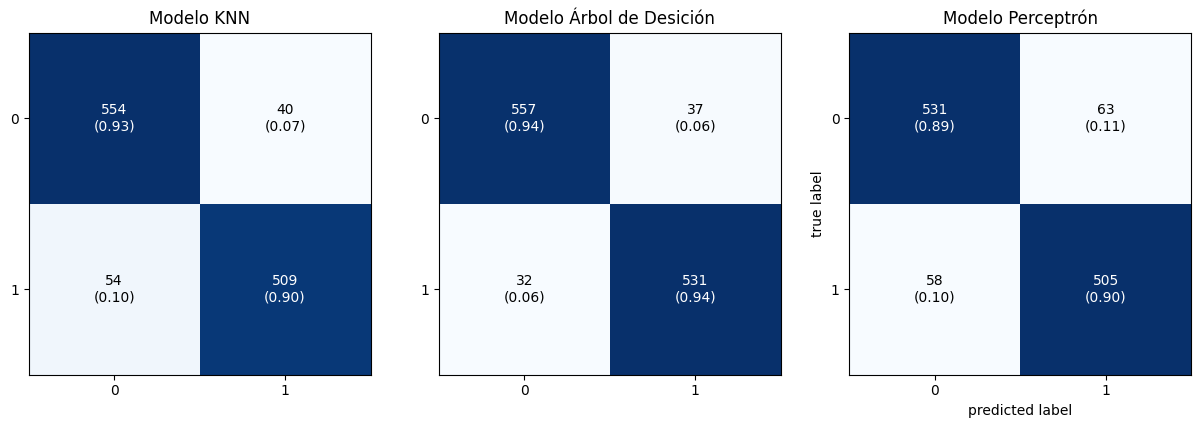

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Dibujamos las matrices de confusión
plot_confusion_matrix(conf_mat=matrix1, show_normed=True, axis=ax[0])
ax[0].set_title('Modelo KNN')

plot_confusion_matrix(conf_mat=matrix2, show_normed=True, axis=ax[1])
ax[1].set_title('Modelo Árbol de Desición')

plot_confusion_matrix(conf_mat=matrix3, show_normed=True, axis=ax[2])
ax[2].set_title('Modelo Perceptrón')

# Mostramos la figura
plt.show()

## TEST